# TEMPLATE MATCHING IMAGE AUGMENTATION

In [2]:
!apt-get update
!apt install libgl1-mesa-glx -y
!pip install opencv-python --upgrade
!python -m pip install torchvision 

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [845 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1027 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1636 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [25.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]    
Get:11 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:13 http://archive.ubuntu.com/ubuntu

In [3]:
!pip install MTM

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 14.0 MB 25.8 MB/s eta 0:00:01     |██████████████████████████▊     | 11.7 MB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 29.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 18.9 MB/s eta 0:00:01     |█████████████████████████████▏  | 5.7 MB 18.9 MB/s eta 0:00:01
     |████████████████████████████████| 180 kB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 27.7 MB/s eta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0
  Attempting uninstall: networkx
    Found existing installation: networkx 2.0
    Uninstalling networkx-2.0:
      Successfully uninstalled networkx-2.0


In [4]:
# 1st import the package and check its version
import mtm
print("mtm version : ", mtm.__version__)

from mtm import matchTemplates
from mtm.detection import plotDetections

from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

mtm version :  1.0.0


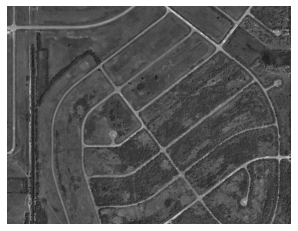

In [5]:
test_image='NewLSTemplates/newLS_drone_highQ.jpg'
image = cv.imread('../../Data/'+test_image,0)
plt.axis("off")
plt.imshow(image, cmap="gray")

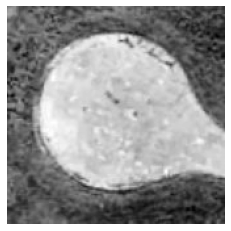

In [25]:
template_image1='NewLSTemplates/newLS_sat_dot7_lowQ.jpg'
template_image2='NewLSTemplates/newLS_sat_dot6_lowQ.jpg'
template_image3='NewLSTemplates/newLS_sat_dot5_lowQ.jpg'
temp0 = cv.imread('../../Data/'+template_image1,0)
temp1=cv.imread('../../Data/'+template_image2,0)
temp2=cv.imread('../../Data/'+template_image3,0)
plt.axis("off")
plt.imshow(temp0, cmap="gray")

In [45]:
# First we create 2 lists
listTemplates = [temp0, temp1, temp2]   # a first list holding the template image(s)
listLabels    = ["temp0", "temp1", "temp2"] # a second list holding the associated labels, this list is optional though, as mentioned in the docstring

# Then call the function matchTemplates (here a single template)
listDetections = matchTemplates(image, 
                                listTemplates,
                                listLabels,
                                scoreThreshold=0.5,
                                searchBox=(0, 0, 3000, 750),
                                maxOverlap=0.1)

In [46]:
print("Found {} hits".format( len(listDetections) ) )
listDetections

Found 11 hits


[(BoundingBox, score:0.58, xywh:(563, 26, 166, 166), index:0, temp0),
 (BoundingBox, score:0.58, xywh:(569, 26, 166, 166), index:0, temp0),
 (BoundingBox, score:0.58, xywh:(571, 26, 166, 166), index:0, temp0),
 (BoundingBox, score:0.58, xywh:(576, 26, 166, 166), index:0, temp0),
 (BoundingBox, score:0.53, xywh:(431, 22, 166, 166), index:0, temp0),
 (BoundingBox, score:0.53, xywh:(436, 23, 166, 166), index:0, temp0),
 (BoundingBox, score:0.50, xywh:(515, 26, 166, 166), index:0, temp0),
 (BoundingBox, score:0.54, xywh:(1125, 1562, 181, 180), index:1, temp1),
 (BoundingBox, score:0.50, xywh:(419, 12, 181, 180), index:1, temp1),
 (BoundingBox, score:0.50, xywh:(434, 12, 181, 180), index:1, temp1),
 (BoundingBox, score:0.50, xywh:(427, 12, 181, 180), index:1, temp1)]

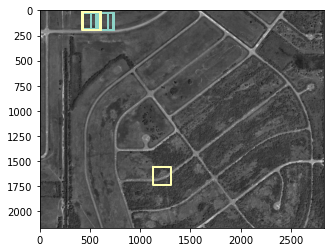

In [47]:
plotDetections(image, listDetections)

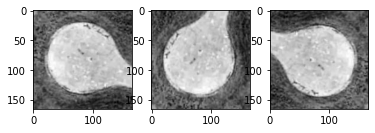

In [37]:
# Initialize list of templates and labels
listTemplates = [temp0,temp1,temp2]
listLabels    = ["Temp0", "Temp1", "Temp2"]

# Initialise figure showing the rotated templates
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

# Perform rotation of the initial template
for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: np.rotate not good here, turns into float!
    listTemplates.append(rotated)
    listLabels.append(str(angle))
    axarr[i+1].imshow(rotated, cmap="gray")
    
    # We could also do some flipping with np.fliplr, flipud

In [40]:
listDetections = matchTemplates(image, 
                                listTemplates,
                                listLabels,
                                scoreThreshold=0.5, 
                                maxOverlap=0)

listDetections

[(BoundingBox, score:0.59, xywh:(953, 1186, 166, 166), index:4, 180),
 (BoundingBox, score:0.58, xywh:(563, 26, 166, 166), index:0, Temp0),
 (BoundingBox, score:0.54, xywh:(1125, 1562, 181, 180), index:1, Temp1),
 (BoundingBox, score:0.51, xywh:(1083, 1803, 166, 166), index:4, 180)]

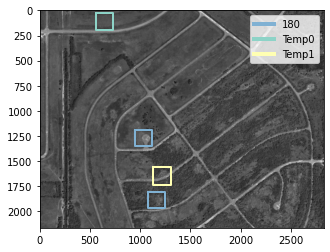

In [39]:
plotDetections(image, listDetections, showLegend=True)